In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, AveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image
import numpy as np
import os
import datetime
%matplotlib inline

In [2]:
trainPath="dermnet_mini/train"
testPath="dermnet_mini/test"

In [4]:
batch_size=128
img_height = 96
img_width = 96

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  trainPath,
  #color_mode='grayscale',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2075 files belonging to 2 classes.
Using 1660 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  trainPath, 
  #color_mode='grayscale',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2075 files belonging to 2 classes.
Using 415 files for validation.


In [6]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  testPath,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 621 files belonging to 2 classes.


2022-06-17 23:39:41.538681: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-06-17 23:39:41.540625: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


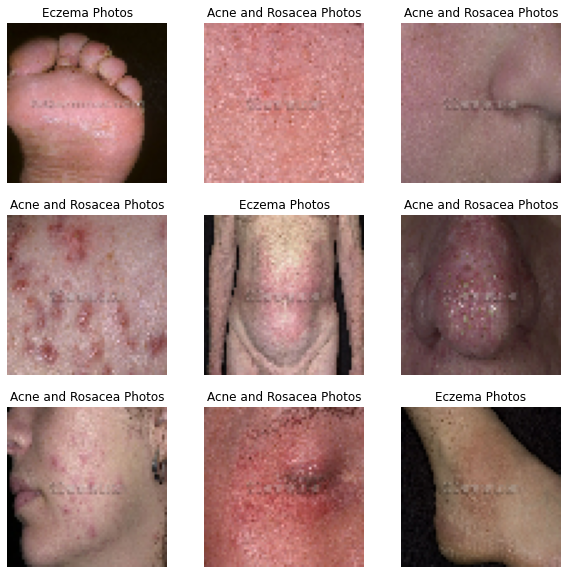

In [6]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
"""def data_augmentation_layer():    
    return Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ])"""

In [ ]:
""""plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")"""

In [17]:
"""inputs= keras.Input(shape=(64,64,3))
x= data_augmentation(inputs)
x=layers.experimental.preprocessing.Rescaling(1./255)(x)
x=Conv2D(32, 3, activation='relu', padding='SAME')(x)
x=MaxPooling2D(pool_size=(2, 2))(x)
x=Conv2D(16, 3, activation='relu', padding='SAME')(x)
x=MaxPooling2D(pool_size=(2, 2))(x)
x=Conv2D(8, 3, activation='relu', padding='SAME')(x)
x=MaxPooling2D(pool_size=(2, 2))(x)
x=Conv2D(4, 3, activation='relu', padding='SAME')(x)
x=MaxPooling2D(pool_size=(2, 2))(x)
x=Flatten(name='flatten')(x)
x=Dropout(0.5)(x)
x=Dense(units=2, activation='relu')(x)
outputs=Dense(units=1, activation='sigmoid')(x)
model=keras.Model(inputs=inputs, outputs=outputs)"""

In [7]:
from tensorflow.keras import regularizers

In [10]:
model = Sequential([
        layers.experimental.preprocessing.Rescaling(1./255),
        Conv2D(16, 3, activation='relu', padding='SAME', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
        AveragePooling2D(pool_size=(2, 2)),
        tf.keras.layers.DepthwiseConv2D(8, 3, activation='relu', padding='SAME', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
        AveragePooling2D(pool_size=(2, 2)),
        Conv2D(4, 3, activation='relu', padding='SAME', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
        AveragePooling2D(pool_size=(2, 2)),
        Flatten(name='flatten'),
        Dense(units=2, activation='sigmoid'),
    ])

In [11]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

In [12]:
history = model.fit(train_ds, validation_data=val_ds, epochs=30)

Epoch 1/30


2022-06-21 18:56:20.134388: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-06-21 18:56:20.136971: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-21 18:56:20.137506: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - ETA: 0s - loss: 0.6759 - accuracy: 0.5976

2022-06-21 18:56:24.190011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 5s 223ms/step - loss: 0.6759 - accuracy: 0.5976 - val_loss: 0.6706 - val_accuracy: 0.5855
Epoch 2/30
13/13 [==============================] - 3s 212ms/step - loss: 0.6599 - accuracy: 0.5988 - val_loss: 0.6523 - val_accuracy: 0.5880
Epoch 3/30
13/13 [==============================] - 3s 208ms/step - loss: 0.6302 - accuracy: 0.6187 - val_loss: 0.6225 - val_accuracy: 0.6386
Epoch 4/30
13/13 [==============================] - 3s 207ms/step - loss: 0.5968 - accuracy: 0.6825 - val_loss: 0.6060 - val_accuracy: 0.6410
Epoch 5/30
13/13 [==============================] - 3s 204ms/step - loss: 0.5914 - accuracy: 0.6735 - val_loss: 0.6243 - val_accuracy: 0.6578
Epoch 6/30
13/13 [==============================] - 3s 201ms/step - loss: 0.5795 - accuracy: 0.6898 - val_loss: 0.6040 - val_accuracy: 0.6530
Epoch 7/30
13/13 [==============================] - 3s 204ms/step - loss: 0.5727 - accuracy: 0.6940 - val_loss: 0.5988 - val_accuracy: 0.6410
Epoch 8/30
13/13 

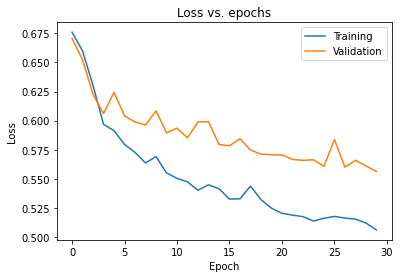

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

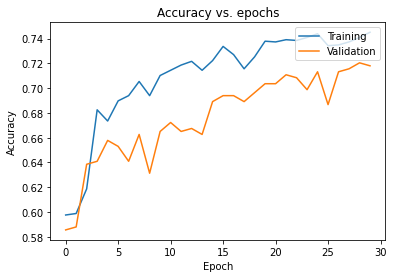

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [15]:
results = model.evaluate(test_ds, verbose=2)

5/5 - 1s - loss: 0.5341 - accuracy: 0.7375


In [16]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("dermnet_model.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("dermnet_model.tflite")
print("Model is %d bytes" % basic_model_size)

2022-06-21 18:58:26.441888: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /var/folders/2c/m8zlsqd53lz1svj1m35dbd4m0000gn/T/tmpe681ru2h/assets
Model is 12420 bytes


2022-06-21 18:58:26.757128: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2022-06-21 18:58:26.757194: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-06-21 18:58:26.757721: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-21 18:58:26.757735: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-06-21 18:58:26.760977: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1137] Optimization results for grappler item: graph_to_optimize
  function_optimizer: funct

In [17]:
!echo "const unsigned char model[] = {" > ./model.h
!cat dermnet_model.tflite | xxd -i      >> ./model.h
!echo "};"                              >> ./model.h

In [18]:
import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")

Header file, model.h, is 76,624 bytes.
